# Dome C Sensitivity Estimates

Compute the sensitivity of the $^{14}$CO profile shape at Dome C to changes in the GCR flux relative to a steady-state model.

In [1]:
import os

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from tqdm import tqdm
from cycler import cycler

from scipy.stats import norm

from coprofile import COProfile
from likelihood import ConstModelLikelihood, VariableModelLikelihood

In [2]:
colors = mpl.cm.viridis(np.linspace(0., 1., 5))

axes_style = { 'grid'      : 'True',
               'labelsize' : '14',
               'labelpad'  : '8.0',
               'prop_cycle': cycler('color', colors) }
grid_style = { 'alpha'     : '0.75',
               'linestyle' : ':' }
font_style = { 'size'      : '14' }

mpl.rc('font', **font_style)
mpl.rc('axes', **axes_style)
mpl.rc('grid', **grid_style)

## Baseline Production Model

Using the average $f\Omega_{\mu_f}$ and $f\Omega_{\mu_{-1}}$ values from the simulations by Hmiel and Dyonisius, we can pick a couple of baseline models.

In [3]:
fmu_neg, fmu_fast = 0.066, 0.072

## $^{14}$CO model classes

These encapsulate models corresponding to specific hypotheses we want to test:

1. A constant model where the GCR flux does not change, but the models include an uncertainty in the cosmogenic production rate due to negative and fast muons. These are parameterized by $f\Omega_{\mu_f}$ and $f\Omega_{\mu_{-}}$.
2. A variable production model parameterized by some quantity that controls its time dependence; for example, a linear change in GCR flux parameterized by a factor $a$.

Both models should account for the number and ranges of free parameters internally.

When initializing, we specify the depth average and relative uncertainty of data sets generated using the models. The model profiles were generated by MATLAB programs provided in this project and packed into a compact [FITS format](https://fits.gsfc.nasa.gov/) for ease of use.

In [4]:
depthavg = 20.   # in meters
relerror = 0.02 

const_models = ConstModelLikelihood('balco_14co_const_models.fits', depth_avg=depthavg, rel_uncertainty=relerror)
linear_models = VariableModelLikelihood('balco_14co_linear_models.fits', depth_avg=depthavg, rel_uncertainty=relerror)
step_models = VariableModelLikelihood('balco_14co_step_models.fits', depth_avg=depthavg, rel_uncertainty=relerror)
burst_models = VariableModelLikelihood('balco_14co_burst_models.fits', depth_avg=depthavg, rel_uncertainty=relerror)

### Check the Model Parameters

Print out the range of parameters represented in each model. The constant model includes a range of production factors, while the variable models include amplitudes of linear/step/burst changes to the flux.

In [5]:
const_models.fofactors

FITS_rec([(0.056, 0.072), (0.056, 0.074), (0.056, 0.076), (0.056, 0.078),
          (0.056, 0.08 ), (0.056, 0.082), (0.056, 0.084), (0.056, 0.086),
          (0.056, 0.088), (0.056, 0.09 ), (0.058, 0.066), (0.058, 0.068),
          (0.058, 0.07 ), (0.058, 0.072), (0.058, 0.074), (0.058, 0.076),
          (0.058, 0.078), (0.058, 0.08 ), (0.058, 0.082), (0.058, 0.084),
          (0.058, 0.086), (0.058, 0.088), (0.06 , 0.062), (0.06 , 0.064),
          (0.06 , 0.066), (0.06 , 0.068), (0.06 , 0.07 ), (0.06 , 0.072),
          (0.06 , 0.074), (0.06 , 0.076), (0.06 , 0.078), (0.06 , 0.08 ),
          (0.06 , 0.082), (0.06 , 0.084), (0.06 , 0.086), (0.062, 0.06 ),
          (0.062, 0.062), (0.062, 0.064), (0.062, 0.066), (0.062, 0.068),
          (0.062, 0.07 ), (0.062, 0.072), (0.062, 0.074), (0.062, 0.076),
          (0.062, 0.078), (0.062, 0.08 ), (0.062, 0.082), (0.062, 0.084),
          (0.064, 0.058), (0.064, 0.06 ), (0.064, 0.062), (0.064, 0.064),
          (0.064, 0.066), (0.064, 0.06

In [6]:
linear_models.amplitudes

FITS_rec([(0.5 ,), (0.51,), (0.52,), (0.53,), (0.54,), (0.55,), (0.56,),
          (0.57,), (0.58,), (0.59,), (0.6 ,), (0.61,), (0.62,), (0.63,),
          (0.64,), (0.65,), (0.66,), (0.67,), (0.68,), (0.69,), (0.7 ,),
          (0.71,), (0.72,), (0.73,), (0.74,), (0.75,), (0.76,), (0.77,),
          (0.78,), (0.79,), (0.8 ,), (0.81,), (0.82,), (0.83,), (0.84,),
          (0.85,), (0.86,), (0.87,), (0.88,), (0.89,), (0.9 ,), (0.91,),
          (0.92,), (0.93,), (0.94,), (0.95,), (0.96,), (0.97,), (0.98,),
          (0.99,), (1.  ,), (1.01,), (1.02,), (1.03,), (1.04,), (1.05,),
          (1.06,), (1.07,), (1.08,), (1.09,), (1.1 ,), (1.11,), (1.12,),
          (1.13,), (1.14,), (1.15,), (1.16,), (1.17,), (1.18,), (1.19,),
          (1.2 ,), (1.21,), (1.22,), (1.23,), (1.24,), (1.25,), (1.26,),
          (1.27,), (1.28,), (1.29,), (1.3 ,), (1.31,), (1.32,), (1.33,),
          (1.34,), (1.35,), (1.36,), (1.37,), (1.38,), (1.39,), (1.4 ,),
          (1.41,), (1.42,), (1.43,), (1.44,), (1.45

In [7]:
step_models.amplitudes

FITS_rec([(0.5 ,), (0.51,), (0.52,), (0.53,), (0.54,), (0.55,), (0.56,),
          (0.57,), (0.58,), (0.59,), (0.6 ,), (0.61,), (0.62,), (0.63,),
          (0.64,), (0.65,), (0.66,), (0.67,), (0.68,), (0.69,), (0.7 ,),
          (0.71,), (0.72,), (0.73,), (0.74,), (0.75,), (0.76,), (0.77,),
          (0.78,), (0.79,), (0.8 ,), (0.81,), (0.82,), (0.83,), (0.84,),
          (0.85,), (0.86,), (0.87,), (0.88,), (0.89,), (0.9 ,), (0.91,),
          (0.92,), (0.93,), (0.94,), (0.95,), (0.96,), (0.97,), (0.98,),
          (0.99,), (1.  ,), (1.01,), (1.02,), (1.03,), (1.04,), (1.05,),
          (1.06,), (1.07,), (1.08,), (1.09,), (1.1 ,), (1.11,), (1.12,),
          (1.13,), (1.14,), (1.15,), (1.16,), (1.17,), (1.18,), (1.19,),
          (1.2 ,), (1.21,), (1.22,), (1.23,), (1.24,), (1.25,), (1.26,),
          (1.27,), (1.28,), (1.29,), (1.3 ,), (1.31,), (1.32,), (1.33,),
          (1.34,), (1.35,), (1.36,), (1.37,), (1.38,), (1.39,), (1.4 ,),
          (1.41,), (1.42,), (1.43,), (1.44,), (1.45

In [8]:
burst_models.amplitudes

FITS_rec([( 1.1,), ( 1.2,), ( 1.3,), ( 1.4,), ( 1.5,), ( 1.6,), ( 1.7,),
          ( 1.8,), ( 1.9,), (10. ,), ( 2. ,), ( 2.1,), ( 2.2,), ( 2.3,),
          ( 2.4,), ( 2.5,), ( 2.6,), ( 2.7,), ( 2.8,), ( 2.9,), ( 3. ,),
          ( 3.1,), ( 3.2,), ( 3.3,), ( 3.4,), ( 3.5,), ( 3.6,), ( 3.7,),
          ( 3.8,), ( 3.9,), ( 4. ,), ( 4.1,), ( 4.2,), ( 4.3,), ( 4.4,),
          ( 4.5,), ( 4.6,), ( 4.7,), ( 4.8,), ( 4.9,), ( 5. ,), ( 5.1,),
          ( 5.2,), ( 5.3,), ( 5.4,), ( 5.5,), ( 5.6,), ( 5.7,), ( 5.8,),
          ( 5.9,), ( 6. ,), ( 6.1,), ( 6.2,), ( 6.3,), ( 6.4,), ( 6.5,),
          ( 6.6,), ( 6.7,), ( 6.8,), ( 6.9,), ( 7. ,), ( 7.1,), ( 7.2,),
          ( 7.3,), ( 7.4,), ( 7.5,), ( 7.6,), ( 7.7,), ( 7.8,), ( 7.9,),
          ( 8. ,), ( 8.1,), ( 8.2,), ( 8.3,), ( 8.4,), ( 8.5,), ( 8.6,),
          ( 8.7,), ( 8.8,), ( 8.9,), ( 9. ,), ( 9.1,), ( 9.2,), ( 9.3,),
          ( 9.4,), ( 9.5,), ( 9.6,), ( 9.7,), ( 9.8,), ( 9.9,)],
         dtype=(numpy.record, [('AMPL', '>f8')]))

## Test Sampling from Models

This is not the main calculation, but it shows how we produce simulated $^{14}$CO data sets from the model profiles and compute Bayes Factors.

### Constant Models

(0.066, 0.072)
B_01 =      9.57808; 0=const model, 1=linear model
B_01 =      4.24608; 0=const model, 1=step model
B_01 =      15.5843; 0=const model, 1=burst model


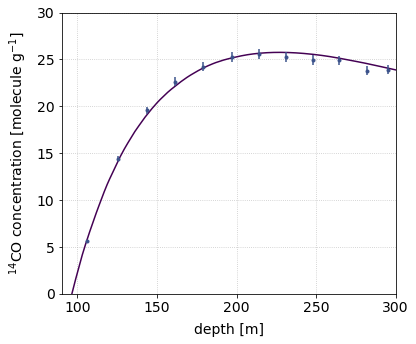

In [9]:
dist = (const_models.fofactors['FOMUNEG'] - fmu_neg)**2 + (const_models.fofactors['FOMUFAST'] - fmu_fast)**2
j = dist.argmin()
data_const = const_models.models[j]
print(const_models.fofactors[j])

fig, ax = plt.subplots(1,1, figsize=(6,5), tight_layout=True)
ax.plot(data_const.z, data_const.CO)
z_samp, CO_samp, dCO_samp = data_const.sample_z()
ax.errorbar(z_samp, CO_samp, yerr=dCO_samp, fmt='.')
ax.set(xlim=(90,300),
       xlabel='depth [m]',
       ylim=(0,30),
       ylabel=r'$^{14}$CO concentration [molecule g$^{-1}$]')

# Try out some likelihood ratio tests.
# The Bayes factors should all be large because we generated data from the constant model.
B01 = const_models.likelihood(z_samp, CO_samp, dCO_samp) / linear_models.likelihood(z_samp, CO_samp, dCO_samp)
print(f'B_01 = {B01:12g}; 0=const model, 1=linear model')

B01 = const_models.likelihood(z_samp, CO_samp, dCO_samp) / step_models.likelihood(z_samp, CO_samp, dCO_samp)
print(f'B_01 = {B01:12g}; 0=const model, 1=step model')

B01 = const_models.likelihood(z_samp, CO_samp, dCO_samp) / burst_models.likelihood(z_samp, CO_samp, dCO_samp)
print(f'B_01 = {B01:12g}; 0=const model, 1=burst model')

### Linear Models

B_01 =      1.07731; 0=const model, 1=linear model
B_01 =     0.471692; 0=const model, 1=step model
B_01 =      252.429; 0=const model, 1=burst model


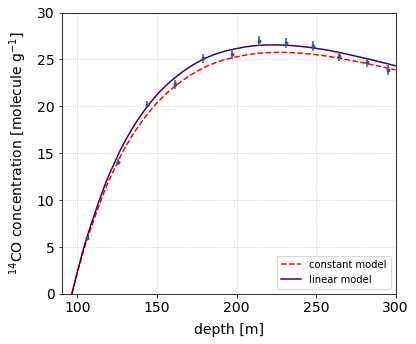

In [10]:
j = np.abs(linear_models.amplitudes['AMPL'] - 1.05).argmin()
data_lin = linear_models.models[j]

fig, ax = plt.subplots(1,1, figsize=(6,5), tight_layout=True)
ax.plot(data_const.z, data_const.CO, 'r--', label='constant model')
ax.plot(data_lin.z, data_lin.CO, label='linear model')
z_samp, CO_samp, dCO_samp = data_lin.sample_z()
ax.errorbar(z_samp, CO_samp, yerr=dCO_samp, fmt='.')
ax.set(xlim=(90,300),
       xlabel='depth [m]',
       ylim=(0,30),
       ylabel=r'$^{14}$CO concentration [molecule g$^{-1}$]')
ax.legend(loc='lower right', fontsize=10)

# Try out some likelihood ratio tests.
# This Bayes factor should be small, favoring the linear model.
B01 = const_models.likelihood(z_samp, CO_samp, dCO_samp) / linear_models.likelihood(z_samp, CO_samp, dCO_samp)
print(f'B_01 = {B01:12g}; 0=const model, 1=linear model')

# This Bayes factor may be small, favoring the step model.
B01 = const_models.likelihood(z_samp, CO_samp, dCO_samp) / step_models.likelihood(z_samp, CO_samp, dCO_samp)
print(f'B_01 = {B01:12g}; 0=const model, 1=step model')

# This Bayes factor could be large, favoring the constant model over the burst model.
B01 = const_models.likelihood(z_samp, CO_samp, dCO_samp) / burst_models.likelihood(z_samp, CO_samp, dCO_samp)
print(f'B_01 = {B01:12g}; 0=const model, 1=burst model')

### Step Models

B_01 =      2.01049; 0=const model, 1=linear model
B_01 =      1.17385; 0=const model, 1=step model
B_01 =    4.287e+06; 0=const model, 1=burst model


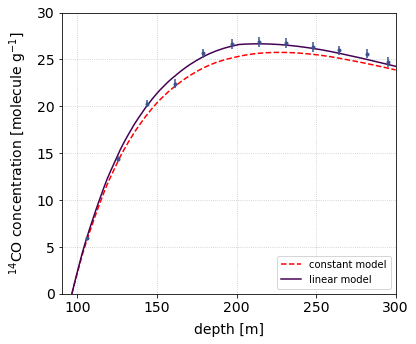

In [11]:
j = np.abs(step_models.amplitudes['AMPL'] - 1.05).argmin()
data_step = step_models.models[j]

fig, ax = plt.subplots(1,1, figsize=(6,5), tight_layout=True)
ax.plot(data_const.z, data_const.CO, 'r--', label='constant model')
ax.plot(data_step.z, data_step.CO, label='linear model')
z_samp, CO_samp, dCO_samp = data_step.sample_z()
ax.errorbar(z_samp, CO_samp, yerr=dCO_samp, fmt='.')
ax.set(xlim=(90,300),
       xlabel='depth [m]',
       ylim=(0,30),
       ylabel=r'$^{14}$CO concentration [molecule g$^{-1}$]')
ax.legend(loc='lower right', fontsize=10)

# Try out some likelihood ratio tests.
# This Bayes factor may be small, favoring the linear model.
B01 = const_models.likelihood(z_samp, CO_samp, dCO_samp) / linear_models.likelihood(z_samp, CO_samp, dCO_samp)
print(f'B_01 = {B01:12g}; 0=const model, 1=linear model')

# This Bayes factor should be small, favoring the step model.
B01 = const_models.likelihood(z_samp, CO_samp, dCO_samp) / step_models.likelihood(z_samp, CO_samp, dCO_samp)
print(f'B_01 = {B01:12g}; 0=const model, 1=step model')

# This Bayes factor could be large, favoring the constant model over the burst model.
B01 = const_models.likelihood(z_samp, CO_samp, dCO_samp) / burst_models.likelihood(z_samp, CO_samp, dCO_samp)
print(f'B_01 = {B01:12g}; 0=const model, 1=burst model')

### Burst Models

B_01 =      2.35569; 0=const model, 1=linear model
B_01 =       1.3205; 0=const model, 1=step model
B_01 =     0.392187; 0=const model, 1=burst model


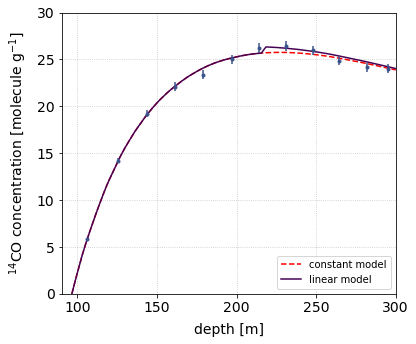

In [12]:
j = np.abs(burst_models.amplitudes['AMPL'] - 1.5).argmin()
data_burst = burst_models.models[j]

fig, ax = plt.subplots(1,1, figsize=(6,5), tight_layout=True)
ax.plot(data_const.z, data_const.CO, 'r--', label='constant model')
ax.plot(data_burst.z, data_burst.CO, label='linear model')
z_samp, CO_samp, dCO_samp = data_burst.sample_z()
ax.errorbar(z_samp, CO_samp, yerr=dCO_samp, fmt='.')
ax.set(xlim=(90,300),
       xlabel='depth [m]',
       ylim=(0,30),
       ylabel=r'$^{14}$CO concentration [molecule g$^{-1}$]')
ax.legend(loc='lower right', fontsize=10)

# Try out some likelihood ratio tests.
# This Bayes factor could be large, favoring the constant model over a linear model.
B01 = const_models.likelihood(z_samp, CO_samp, dCO_samp) / linear_models.likelihood(z_samp, CO_samp, dCO_samp)
print(f'B_01 = {B01:12g}; 0=const model, 1=linear model')

# This Bayes factor could be large, favoring a constant model over a step model.
B01 = const_models.likelihood(z_samp, CO_samp, dCO_samp) / step_models.likelihood(z_samp, CO_samp, dCO_samp)
print(f'B_01 = {B01:12g}; 0=const model, 1=step model')

# This Bayes factor should be small, favoring the burst model.
B01 = const_models.likelihood(z_samp, CO_samp, dCO_samp) / burst_models.likelihood(z_samp, CO_samp, dCO_samp)
print(f'B_01 = {B01:12g}; 0=const model, 1=burst model')

## Test Bayes Factor Computation

### Alternative Hypothesis: Linear Model

Test two cases:
1. A middle-of-the-road constant model, and compute the Bayes Factor $B_{01}$, where model 0 is hypothesis of a constant flux (with negative and fast muon rates as nuisance parameters) and model 1 is a linear growth/decrease hypothesis (with negative and fast muon rates fixed and growth amplitude the nuisance parameter).
2. A middle-of-the-road linear increase model (15% increase over 6000 yr).

In case 1, expect $B_{01}>1$ on average, and in case 2, expect $B_{01}<1$ on average.

In [13]:
dist = (const_models.fofactors['FOMUNEG'] - fmu_neg)**2 + (const_models.fofactors['FOMUFAST'] - fmu_fast)**2
j = dist.argmin()
data_const = const_models.models[j]

# Generate B_01, where 0=const model and 1=linear model,
# under the null hypothesis where the data are produced by the "baseline" constant model.
BF_lin_null = []
for i in tqdm(range(10000)):
    z_samp, CO_samp, dCO_samp = data_const.sample_z()
    B = const_models.likelihood(z_samp, CO_samp, dCO_samp) / linear_models.likelihood(z_samp, CO_samp, dCO_samp)
    BF_lin_null.append(B)

100%|████████████████████████████████████| 10000/10000 [00:43<00:00, 230.45it/s]


In [14]:
j = np.abs(linear_models.amplitudes['AMPL'] - 1.12).argmin()
data_lin = linear_models.models[j]

# Generate B_01, where 0=const model and 1=linear model,
# under the alternative hypothesis where the data are produced
# by a middle-of-the-road linear model.
BF_lin = []
for i in tqdm(range(10000)):
    z_samp, CO_samp, dCO_samp = data_lin.sample_z()
    B = const_models.likelihood(z_samp, CO_samp, dCO_samp) / linear_models.likelihood(z_samp, CO_samp, dCO_samp)
    BF_lin.append(B)

100%|████████████████████████████████████| 10000/10000 [00:43<00:00, 228.93it/s]


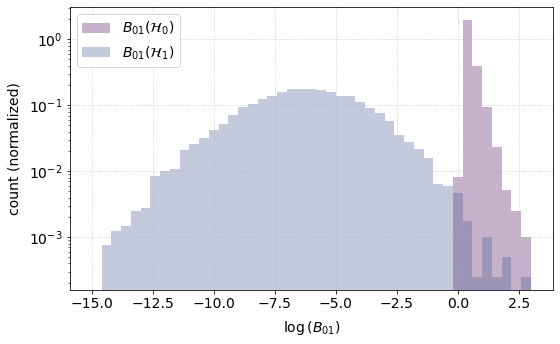

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

logBmin = np.round(np.log10(np.min(np.minimum(BF_lin_null, BF_lin))))
logBmax = np.round(np.log10(np.max(np.maximum(BF_lin_null, BF_lin))))
nbins = int(np.round((logBmax - logBmin) / 0.4) + 1)

ax.hist(np.log10(BF_lin_null), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.3, density=1,
        label=r'$B_{01}(\mathcal{H}_0)$');
ax.hist(np.log10(BF_lin), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.3, density=1,
        label=r'$B_{01}(\mathcal{H}_1)$');
ax.set(xlabel=r'$\log{(B_{01})}$',
       ylabel='count (normalized)',
       yscale='log')

ax.legend(loc='upper left')

fig.tight_layout()

## Null Distributions for All Hypotheses

Read in the distributions of the Bayes Factor for all three alternative hypotheses (linear change, step change, burst) generated under the null hypothesis of a constant GCR flux. Note that for the null hypothesis, a baseline model corresponding to $f\Omega_{\mu_{-}}=0.066$ and $f\Omega_{\mu_f}=0.072$ was used.

The distributions were generated using the external `null-generator.py` script.

In [16]:
if os.path.exists('bf_null_20m_2pct_0.0660_0.0720.npz'):
    npzf = np.load('bf_null_20m_2pct_0.0660_0.0720.npz')
    BF_lin_null = npzf['BF_lin']
    BF_step_null = npzf['BF_step']
    BF_100yr_null = npzf['BF_100yr']

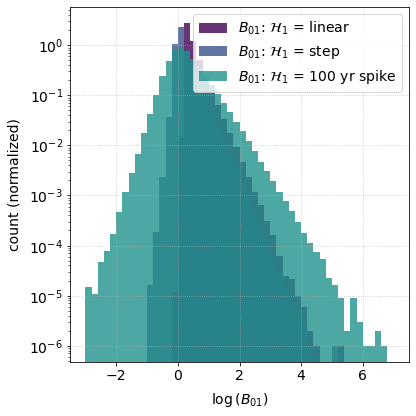

In [17]:
logBmin = np.round(np.log10(np.min(np.minimum(np.minimum(BF_lin_null, BF_100yr_null), BF_step_null))))
logBmax = np.round(np.log10(np.max(np.maximum(np.maximum(BF_lin_null, BF_100yr_null), BF_step_null))))
nbins = int(np.round((logBmax - logBmin) / 0.2) + 1)

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.hist(np.log10(BF_lin_null), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: $\mathcal{H}_1$ = linear');
ax.hist(np.log10(BF_step_null), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: $\mathcal{H}_1$ = step');
ax.hist(np.log10(BF_100yr_null), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: $\mathcal{H}_1$ = 100 yr spike');
ax.set(xlabel=r'$\log{(B_{01})}$',
       ylabel='count (normalized)',
       yscale='log')

ax.legend(loc='best')

fig.tight_layout()

## Compute Sensitivity Thresholds

Here we compute the discovery potential for a signal by varying the amplitudes of the variable models and assessing how often the Bayes Factor of our realized data sets puts us into the $3\sigma$ and $5\sigma$ tails of the null distributions.

The sensitivity is defined as the signal amplitude(s) that give a $3\sigma$ or $5\sigma$ "discovery," assuming the null hypothesis is correct, in at least 50% of random trials. Here we vary the amplitude by trial and error until we achieve the right level.

Note that due to the gridded amplitude values in the generated models, the discovery thresholds may be approximate and not exact.

### Bayes Factor: Linear Model, $3\sigma$ Sensitivity

In [18]:
j = np.abs(linear_models.amplitudes['AMPL'] - 1.04).argmin()
model = linear_models.models[j]
    
# model = COProfile('check_linear_1.14.txt')
# model = COProfile('co14_linear1.15.txt')
bf_th = np.zeros(3, dtype=float)
nMC = 10000
BF_store = np.zeros(nMC, dtype=float)
N = len(BF_lin_null)

for i in tqdm(range(nMC)):
    z_samp, CO_samp, dCO_samp = model.sample_z()
    B = const_models.likelihood(z_samp, CO_samp, dCO_samp) / linear_models.likelihood(z_samp, CO_samp, dCO_samp)
    BF_store[i] = B
    
    # p-value is the tail of the null distribution BF_lin that is
    # less then or equal to the current Bayes Factor.
    # If the distributions don't overlap, then set p=1/N as a lower bound.
    p = np.maximum(np.sum(BF_lin_null <= B) / N, 1./N)
    sigma = norm.isf(p)
    
#     print(np.log10(B), p, sigma, sigma>np.asarray([3,4,5]))
    for j, sig_thr in enumerate([3.,4.,5.]):
        if sigma >= sig_thr:
            bf_th[j] += 1

print(bf_th / nMC)

100%|█████████████████████████████████████| 10000/10000 [01:49<00:00, 91.59it/s]

[0.3328 0.2013 0.098 ]


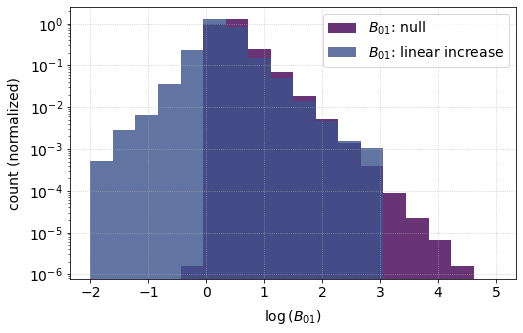

In [19]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

logBmin = np.round(np.log10(np.minimum(np.min(BF_lin_null), np.min(BF_store))))
logBmax = np.round(np.log10(np.maximum(np.max(BF_lin_null), np.max(BF_store))))
nbins = int(np.round((logBmax - logBmin) / 0.4) + 1)

ax.hist(np.log10(BF_lin_null), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: null');
ax.hist(np.log10(BF_store), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: linear increase');
ax.set(xlabel=r'$\log{(B_{01})}$',
       ylabel='count (normalized)',
       yscale='log'
      )

ax.legend(loc='best')

### Bayes Factor: Linear Model, $5\sigma$ Sensitivity

In [20]:
j = np.abs(linear_models.amplitudes['AMPL'] - 1.06).argmin()
model = linear_models.models[j]
    
# model = COProfile('check_linear_1.14.txt')
# model = COProfile('co14_linear1.15.txt')
bf_th = np.zeros(3, dtype=float)
nMC = 10000
BF_store = np.zeros(nMC, dtype=float)
N = len(BF_lin_null)

for i in tqdm(range(nMC)):
    z_samp, CO_samp, dCO_samp = model.sample_z()
    B = const_models.likelihood(z_samp, CO_samp, dCO_samp) / linear_models.likelihood(z_samp, CO_samp, dCO_samp)
    BF_store[i] = B
    
    # p-value is the tail of the null distribution BF_lin that is
    # less then or equal to the current Bayes Factor.
    # If the distributions don't overlap, then set p=1/N as a lower bound.
    p = np.maximum(np.sum(BF_lin_null <= B) / N, 1./N)
    sigma = norm.isf(p)
    
#     print(np.log10(B), p, sigma, sigma>np.asarray([3,4,5]))
    for j, sig_thr in enumerate([3.,4.,5.]):
        if sigma >= sig_thr:
            bf_th[j] += 1

print(bf_th / nMC)

100%|█████████████████████████████████████| 10000/10000 [01:49<00:00, 91.44it/s]

[0.8152 0.7597 0.6742]


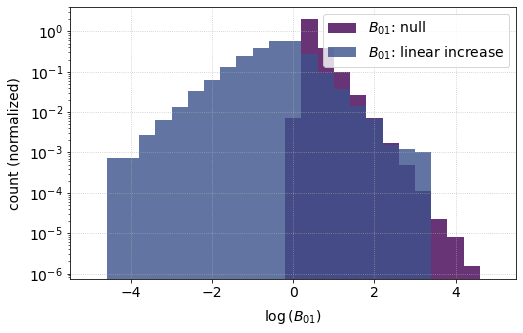

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

logBmin = np.round(np.log10(np.minimum(np.min(BF_lin_null), np.min(BF_store))))
logBmax = np.round(np.log10(np.maximum(np.max(BF_lin_null), np.max(BF_store))))
nbins = int(np.round((logBmax - logBmin) / 0.4) + 1)

ax.hist(np.log10(BF_lin_null), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: null');
ax.hist(np.log10(BF_store), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: linear increase');
ax.set(xlabel=r'$\log{(B_{01})}$',
       ylabel='count (normalized)',
       yscale='log'
      )

ax.legend(loc='best')

### Bayes Factor: Step Model, $3\sigma$ Sensitivity

In [22]:
j = np.abs(step_models.amplitudes['AMPL'] - 1.04).argmin()
model = step_models.models[j]
    
# model = COProfile('check_linear_1.14.txt')
# model = COProfile('co14_linear1.15.txt')
bf_th = np.zeros(3, dtype=float)
nMC = 10000
BF_store = np.zeros(nMC, dtype=float)
N = len(BF_step_null)

for i in tqdm(range(nMC)):
    z_samp, CO_samp, dCO_samp = model.sample_z()
    B = const_models.likelihood(z_samp, CO_samp, dCO_samp) / step_models.likelihood(z_samp, CO_samp, dCO_samp)
    BF_store[i] = B
    
    # p-value is the tail of the null distribution BF_lin that is
    # less then or equal to the current Bayes Factor.
    # If the distributions don't overlap, then set p=1/N as a lower bound.
    p = np.maximum(np.sum(BF_step_null <= B) / N, 1./N)
    sigma = norm.isf(p)
    
#     print(np.log10(B), p, sigma, sigma>np.asarray([3,4,5]))
    for j, sig_thr in enumerate([3.,4.,5.]):
        if sigma >= sig_thr:
            bf_th[j] += 1

print(bf_th / nMC)

100%|█████████████████████████████████████| 10000/10000 [01:49<00:00, 91.52it/s]

[0.4572 0.2576 0.1101]


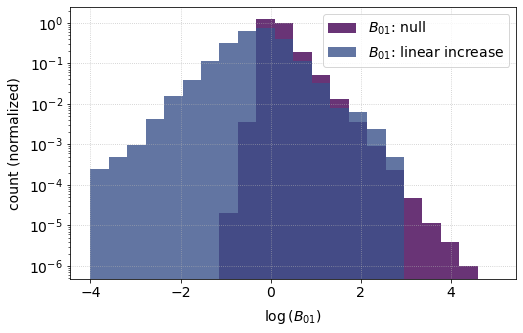

In [23]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

logBmin = np.round(np.log10(np.minimum(np.min(BF_step_null), np.min(BF_store))))
logBmax = np.round(np.log10(np.maximum(np.max(BF_step_null), np.max(BF_store))))
nbins = int(np.round((logBmax - logBmin) / 0.4) + 1)

ax.hist(np.log10(BF_step_null), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: null');
ax.hist(np.log10(BF_store), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: linear increase');
ax.set(xlabel=r'$\log{(B_{01})}$',
       ylabel='count (normalized)',
       yscale='log'
      )

ax.legend(loc='best')

### Bayes Factor: Step Model, $5\sigma$ Sensitivity

In [24]:
j = np.abs(step_models.amplitudes['AMPL'] - 1.06).argmin()
model = step_models.models[j]
    
# model = COProfile('check_linear_1.14.txt')
# model = COProfile('co14_linear1.15.txt')
bf_th = np.zeros(3, dtype=float)
nMC = 10000
BF_store = np.zeros(nMC, dtype=float)
N = len(BF_step_null)

for i in tqdm(range(nMC)):
    z_samp, CO_samp, dCO_samp = model.sample_z()
    B = const_models.likelihood(z_samp, CO_samp, dCO_samp) / step_models.likelihood(z_samp, CO_samp, dCO_samp)
    BF_store[i] = B
    
    # p-value is the tail of the null distribution BF_lin that is
    # less then or equal to the current Bayes Factor.
    # If the distributions don't overlap, then set p=1/N as a lower bound.
    p = np.maximum(np.sum(BF_step_null <= B) / N, 1./N)
    sigma = norm.isf(p)
    
#     print(np.log10(B), p, sigma, sigma>np.asarray([3,4,5]))
    for j, sig_thr in enumerate([3.,4.,5.]):
        if sigma >= sig_thr:
            bf_th[j] += 1

print(bf_th / nMC)

100%|█████████████████████████████████████| 10000/10000 [01:49<00:00, 91.18it/s]

[0.8965 0.8337 0.7288]


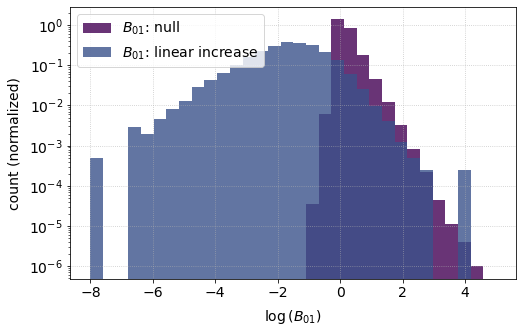

In [25]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

logBmin = np.round(np.log10(np.minimum(np.min(BF_step_null), np.min(BF_store))))
logBmax = np.round(np.log10(np.maximum(np.max(BF_step_null), np.max(BF_store))))
nbins = int(np.round((logBmax - logBmin) / 0.4) + 1)

ax.hist(np.log10(BF_step_null), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: null');
ax.hist(np.log10(BF_store), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: linear increase');
ax.set(xlabel=r'$\log{(B_{01})}$',
       ylabel='count (normalized)',
       yscale='log'
      )

ax.legend(loc='best')

### Bayes Factor: Burst Model, $3\sigma$ Sensitivity

In [26]:
j = np.abs(burst_models.amplitudes['AMPL'] - 2.5).argmin()
model = burst_models.models[j]
print(burst_models.amplitudes[j])
    
# model = COProfile('check_linear_1.14.txt')
# model = COProfile('co14_linear1.15.txt')
bf_th = np.zeros(3, dtype=float)
nMC = 10000
BF_store = np.zeros(nMC, dtype=float)
N = len(BF_100yr_null)

for i in tqdm(range(nMC)):
    z_samp, CO_samp, dCO_samp = model.sample_z()
    B = const_models.likelihood(z_samp, CO_samp, dCO_samp) / burst_models.likelihood(z_samp, CO_samp, dCO_samp)
    BF_store[i] = B
    
    # p-value is the tail of the null distribution BF_lin that is
    # less then or equal to the current Bayes Factor.
    # If the distributions don't overlap, then set p=1/N as a lower bound.
    p = np.maximum(np.sum(BF_100yr_null <= B) / N, 1./N)
    sigma = norm.isf(p)
    
#     print(np.log10(B), p, sigma, sigma>np.asarray([3,4,5]))
    for j, sig_thr in enumerate([3.,4.,5.]):
        if sigma >= sig_thr:
            bf_th[j] += 1

print(bf_th / nMC)

(2.5)


100%|█████████████████████████████████████| 10000/10000 [01:49<00:00, 91.03it/s]

[0.5029 0.1971 0.0464]


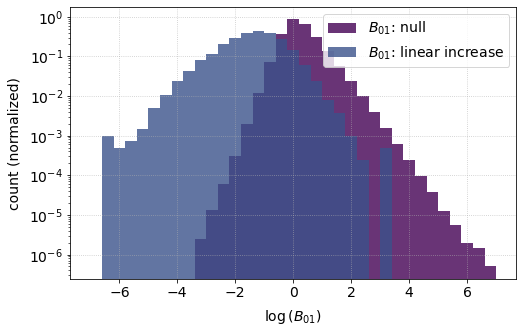

In [27]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

logBmin = np.round(np.log10(np.minimum(np.min(BF_100yr_null), np.min(BF_store))))
logBmax = np.round(np.log10(np.maximum(np.max(BF_100yr_null), np.max(BF_store))))
nbins = int(np.round((logBmax - logBmin) / 0.4) + 1)

ax.hist(np.log10(BF_100yr_null), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: null');
ax.hist(np.log10(BF_store), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: linear increase');
ax.set(xlabel=r'$\log{(B_{01})}$',
       ylabel='count (normalized)',
       yscale='log'
      )

ax.legend(loc='best')

### Bayes Factor: Burst Model, $5\sigma$ Sensitivity

In [28]:
j = np.abs(burst_models.amplitudes['AMPL'] - 3.5).argmin()
model = burst_models.models[j]
print(burst_models.amplitudes[j])
    
# model = COProfile('check_linear_1.14.txt')
# model = COProfile('co14_linear1.15.txt')
bf_th = np.zeros(3, dtype=float)
nMC = 10000
BF_store = np.zeros(nMC, dtype=float)
N = len(BF_100yr_null)

for i in tqdm(range(nMC)):
    z_samp, CO_samp, dCO_samp = model.sample_z()
    B = const_models.likelihood(z_samp, CO_samp, dCO_samp) / burst_models.likelihood(z_samp, CO_samp, dCO_samp)
    BF_store[i] = B
    
    # p-value is the tail of the null distribution BF_lin that is
    # less then or equal to the current Bayes Factor.
    # If the distributions don't overlap, then set p=1/N as a lower bound.
    p = np.maximum(np.sum(BF_100yr_null <= B) / N, 1./N)
    sigma = norm.isf(p)
    
#     print(np.log10(B), p, sigma, sigma>np.asarray([3,4,5]))
    for j, sig_thr in enumerate([3.,4.,5.]):
        if sigma >= sig_thr:
            bf_th[j] += 1

print(bf_th / nMC)

(3.5)


100%|█████████████████████████████████████| 10000/10000 [01:57<00:00, 85.23it/s]

[0.9183 0.7832 0.5264]


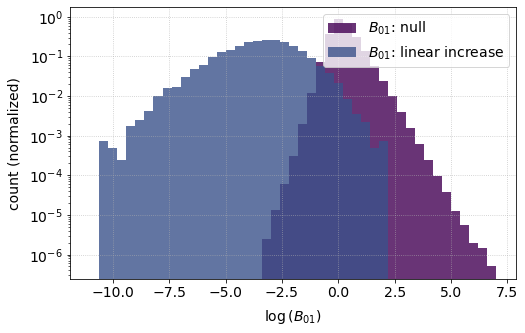

In [29]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

logBmin = np.round(np.log10(np.minimum(np.min(BF_100yr_null), np.min(BF_store))))
logBmax = np.round(np.log10(np.maximum(np.max(BF_100yr_null), np.max(BF_store))))
nbins = int(np.round((logBmax - logBmin) / 0.4) + 1)

ax.hist(np.log10(BF_100yr_null), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: null');
ax.hist(np.log10(BF_store), bins=np.linspace(logBmin, logBmax, nbins), alpha=0.8, density=1,
        label=r'$B_{01}$: linear increase');
ax.set(xlabel=r'$\log{(B_{01})}$',
       ylabel='count (normalized)',
       yscale='log'
      )

ax.legend(loc='best')